/home/praveen/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


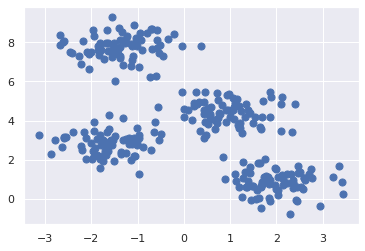

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns;sns.set()
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

x,y_true = make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0)
plt.scatter(x[:,0],x[:,1],s=50)

In [2]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(x)
y_means=kmeans.predict(x)
print(y_means)

[2 1 3 1 2 2 0 3 1 1 0 1 3 1 2 3 3 2 0 0 2 2 3 0 0 3 2 3 0 3 1 1 3 1 1 1 1
 1 0 2 3 0 3 3 0 0 1 0 1 2 0 2 1 2 2 0 1 0 1 2 1 3 1 0 0 0 1 2 1 0 3 0 1 0
 0 1 0 3 2 1 2 3 2 2 1 3 2 3 1 1 3 2 1 0 0 3 2 2 3 0 1 2 1 2 3 2 2 3 1 3 0
 0 2 1 2 3 1 2 2 3 0 2 0 2 2 2 2 0 2 0 1 0 0 2 1 0 0 1 3 1 1 0 3 0 3 0 1 3
 1 1 1 3 1 3 2 0 1 0 2 3 1 3 3 2 3 0 0 3 2 3 3 1 2 3 0 1 2 2 3 0 2 3 0 0 3
 3 3 3 2 1 3 0 3 3 0 0 0 3 0 1 3 0 2 0 3 1 0 1 3 1 3 0 3 3 1 0 0 2 2 3 1 2
 2 0 2 0 3 1 1 3 3 1 3 2 0 3 2 0 1 0 2 3 2 1 1 1 1 0 0 1 3 0 2 3 0 0 0 2 2
 1 3 3 0 2 1 0 3 1 3 2 2 0 0 3 2 2 2 3 1 1 2 2 3 2 2 2 1 0 1 3 2 2 1 1 1 2
 2 3 1 0]


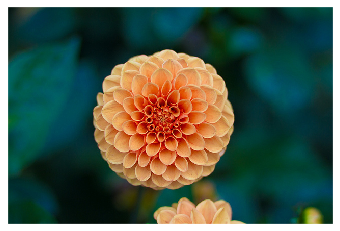

In [3]:
from sklearn.datasets import load_sample_image
china = load_sample_image('flower.jpg')
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(china)

In [4]:
china.shape

(427, 640, 3)

In [5]:
data = china/255.0
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [6]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

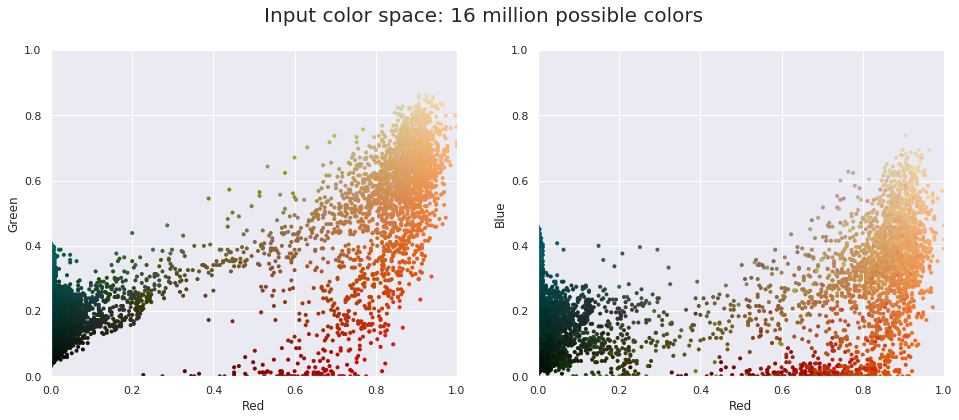

In [7]:
plot_pixels(data, title='Input color space: 16 million possible colors')

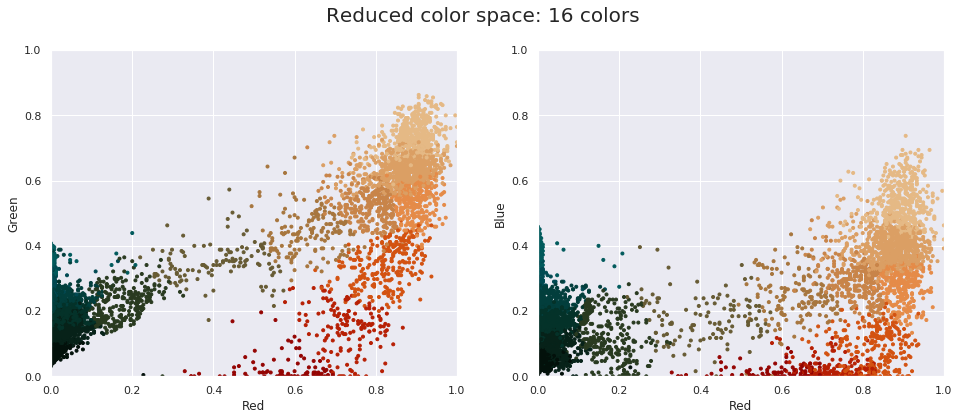

In [8]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

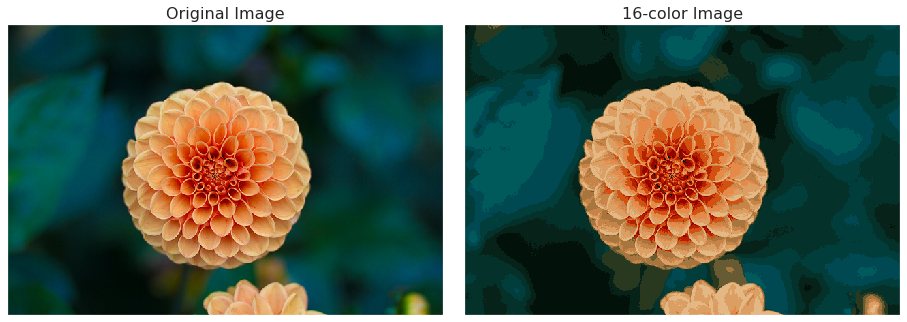

In [9]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

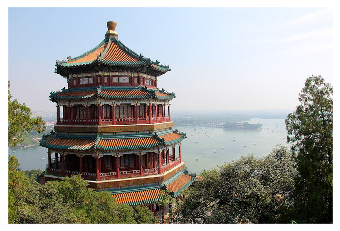

In [10]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);


In [11]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [12]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

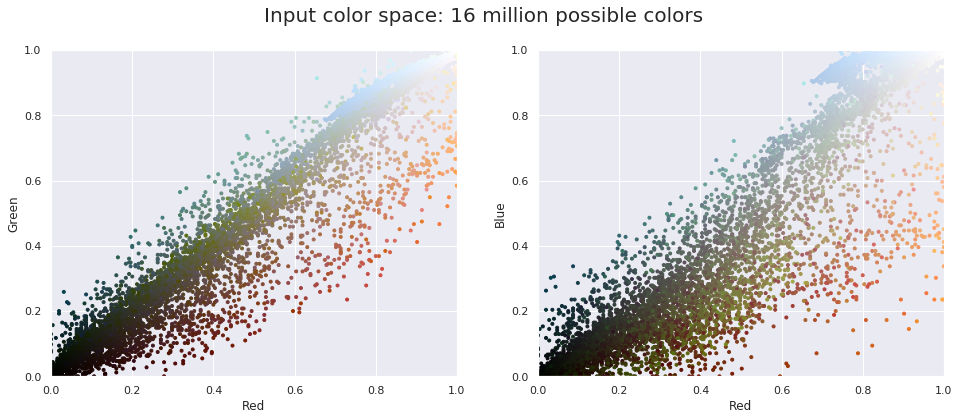

In [13]:
plot_pixels(data, title='Input color space: 16 million possible colors')

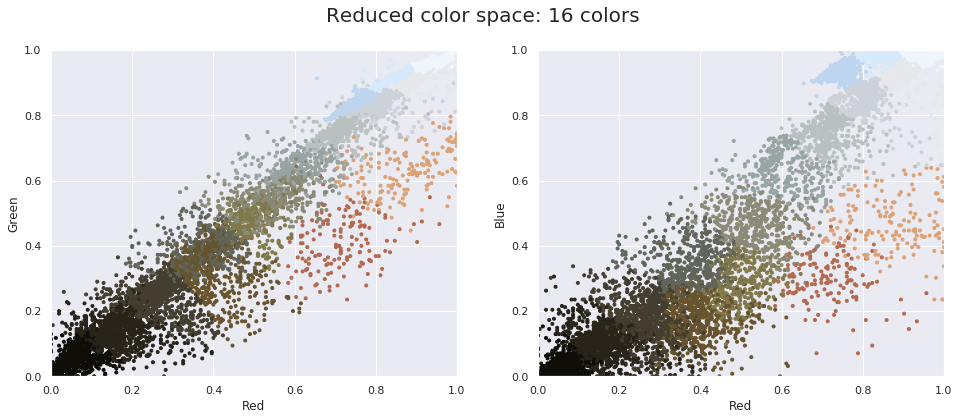

In [14]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

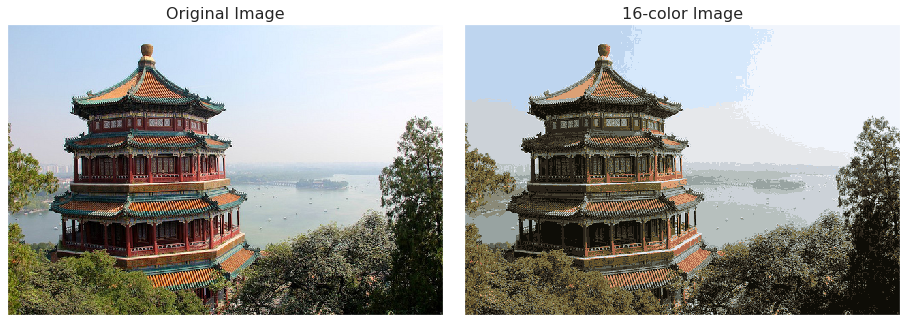

In [15]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);